In [1]:
!pip install mlxtend==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
#data preprocessing
with open('/work/wdbc.pkl', 'rb') as f:
    wdbc = pickle.load(f)
df = wdbc.drop(["id"], axis=1)
df

,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
#define x and y
x = df.drop(['malignant'], axis=1)
y = df['malignant']

In [5]:
# Normalization
x_norm = (x-x.mean())/x.std()
df_norm = pd.concat([y,x_norm], axis=1)

In [6]:
#extract mean data
df_0 = df.iloc[:,0:11]
df_0_norm = df_norm.iloc[:,0:11]
#extract standard deviation data
df_1 = df.iloc[:,11:21]
df_1_norm = df_norm.iloc[:,11:21]
#extract worst data
df_2 = df.iloc[:,21:31]
df_2_norm = df_norm.iloc[:,21:31]

### Data exploration

0    357
1    212
Name: malignant, dtype: int64


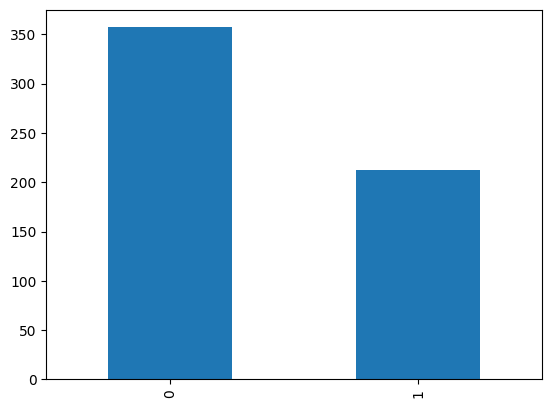

In [7]:
val_counts = df['malignant'].value_counts().plot.bar()
mali_counts = df['malignant'].value_counts()
print(mali_counts)

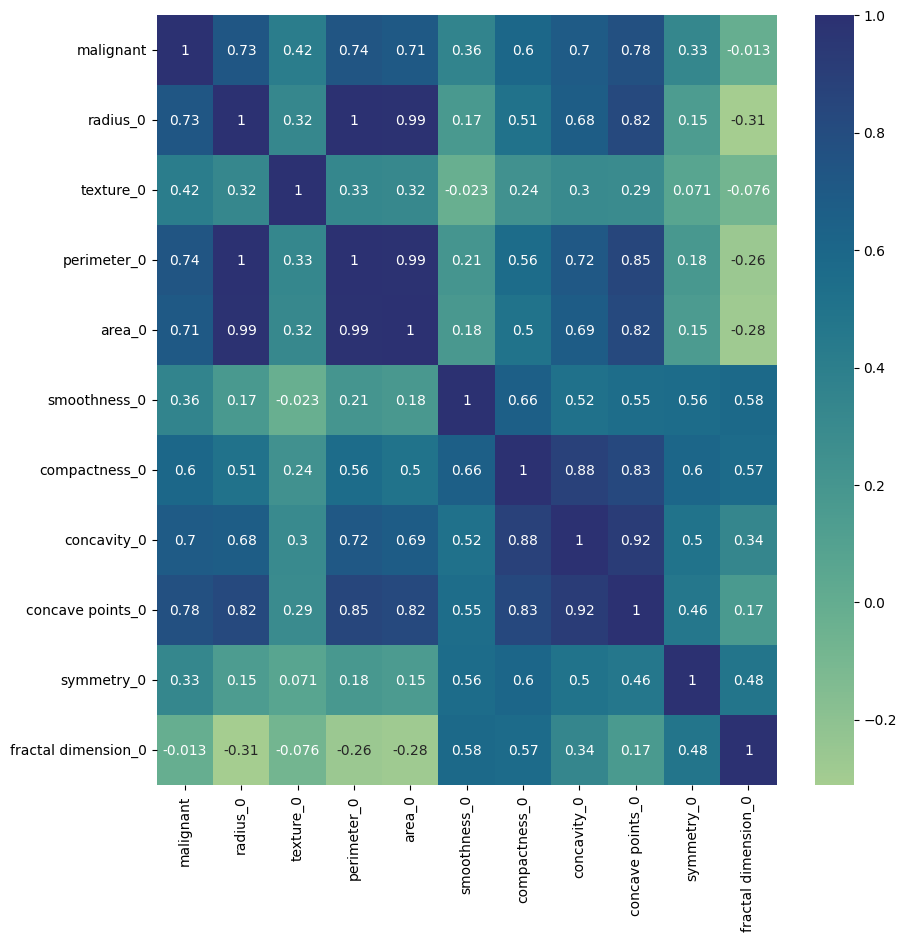

In [8]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_0.corr(),annot=True,cmap="crest")

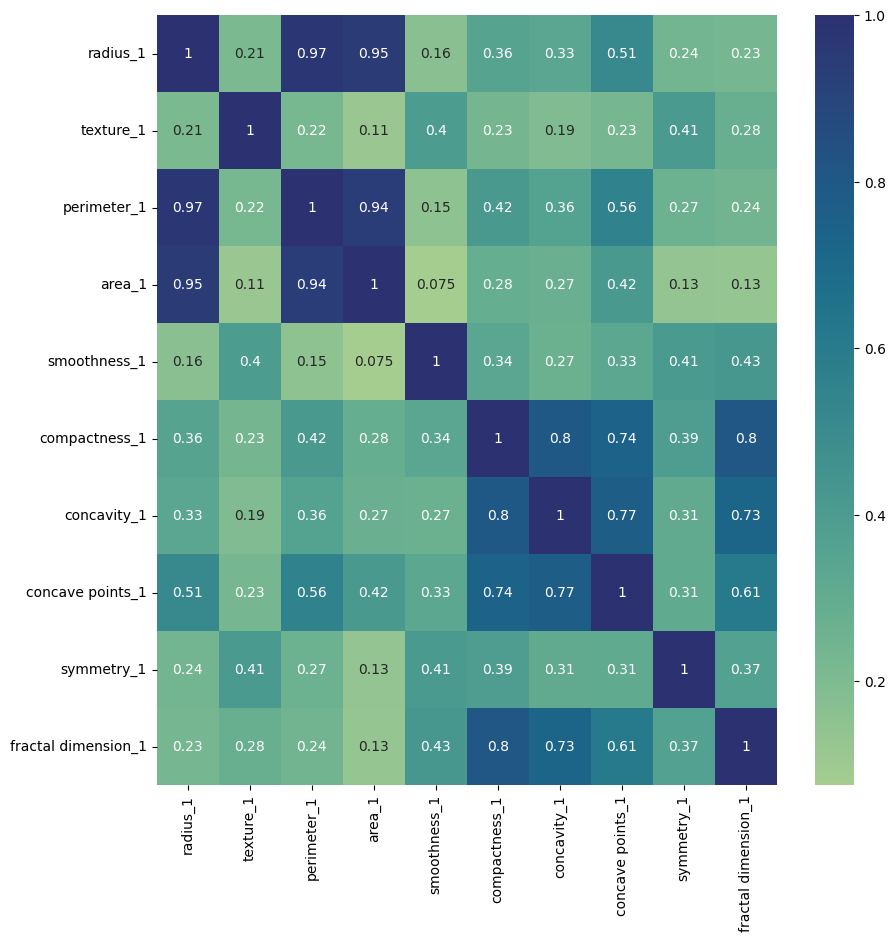

In [9]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_1.corr(),annot=True, cmap="crest")

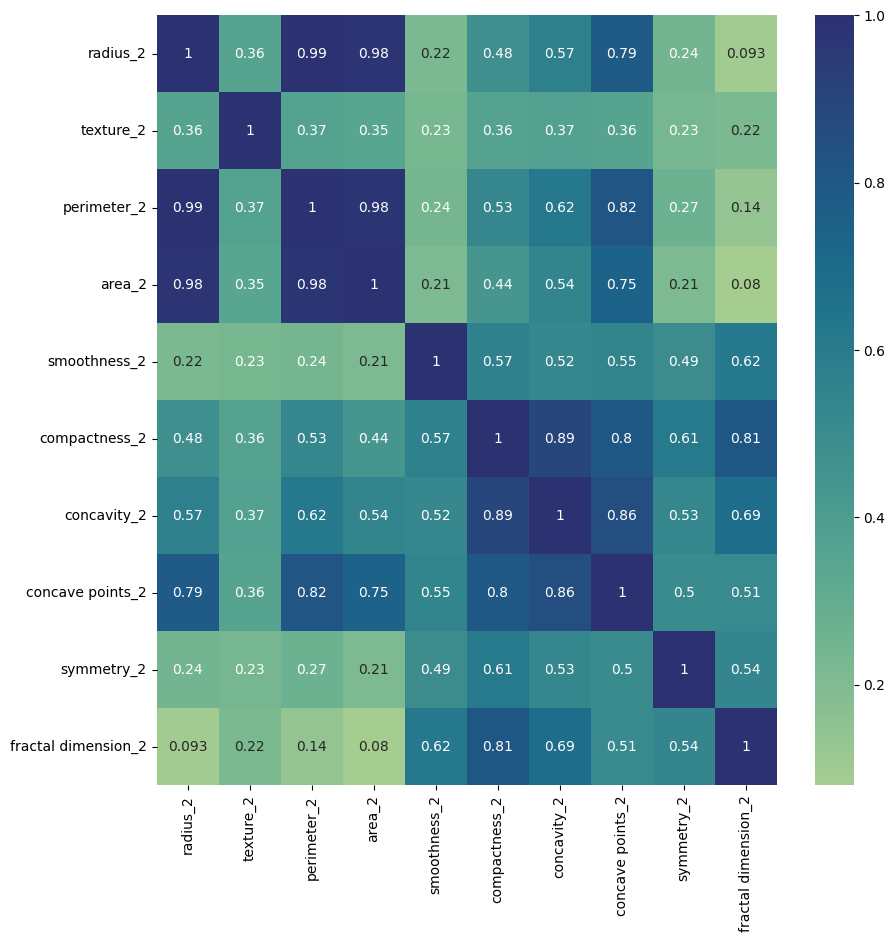

In [10]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_2.corr(),annot=True, cmap="crest")

### Feature extraction

radius_0 are correlated to area_0 and perimeter_0. Choose area_0.
compactness_0 are correlated to concavity_0 and concave points_0. Choose concavity_0.

radius_1 are correlated to perimeter_1 and area_1. Choose area_1
compactness_1 are correlated to concavity_1 and concave points_1. Choose concavity_1.

radius_2 are correlated to perimeter_2 and area_2. Choose area_2.
compactness_2 are correlated to concavity_2 and concave points_2. Choose concavity_2.

In [11]:
#drop correlated features
drop_list = ['radius_0','perimeter_0','compactness_0','concave points_0','radius_1','perimeter_1','compactness_1','concave points_1','radius_2','perimeter_2','compactness_2','concave points_2']
x_data = x_norm.drop(drop_list, axis=1)

### Rule-based classifier

In [12]:
#size
area_mean = df_0['radius_0'].mean()
peri_mean = df_0['perimeter_0'].mean()
radi_mean = df_0['radius_0'].mean()

In [13]:
#shape
compact_mean = df_0['compactness_0'].mean()
smooth_mean = df_0['smoothness_0'].mean()

In [14]:
#structure
texture_mean = df_0['texture_0'].mean()
concavity_mean = df_0['concavity_0'].mean()
concapoint_mean = df_0['concave points_0'].mean()

In [15]:
#homogeneity
var_mean = df_1.mean()
var_mean

radius_1                0.405172
texture_1               1.216853
perimeter_1             2.866059
area_1                 40.337079
smoothness_1            0.007041
compactness_1           0.025478
concavity_1             0.031894
concave points_1        0.011796
symmetry_1              0.020542
fractal dimension_1     0.003795
dtype: float64

In [16]:
#If [cell size is abnormal]:
#or [cell shape is abnormal]
#or [cell texture is abnormal]
#or [cell homogeneity is abnormal], 
#then: diagnosis is malignant, 
#otherwise: diagnosis is benign.

malignant=[]
benign=[]



def rule_based_classifier(idx, row):
    if row['area_0'] > area_mean and row['perimeter_0'] > peri_mean and row['radius_0'] > radi_mean:
        malignant.append(row['id'])
    elif row['compactness_0'] > compact_mean and row['smoothness_0'] > smooth_mean:
        malignant.append(row['id'])
    elif row['texture_0'] > texture_mean and row['concavity_0'] > concavity_mean and row['concave points_0'] > concapoint_mean:
        malignant.append(row['id'])
    else:
        benign.append(row['id'])

for index, row in wdbc.iterrows():
    rule_based_classifier(index,row)
#malignant
#benign

True Positive is: 206 False Positive is: 89 True Negtive is: 268 False Negative is: 6


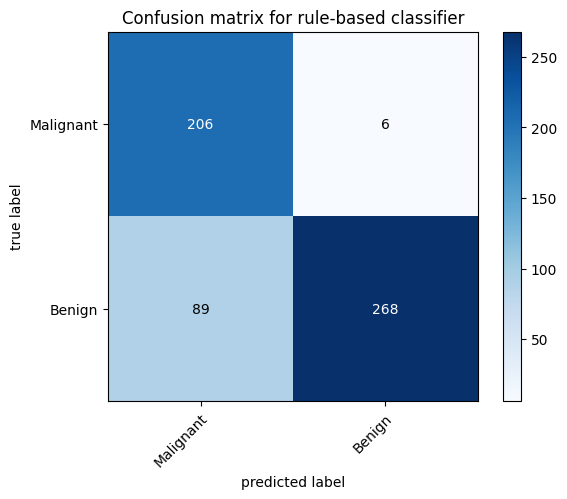

The accuracy of rule based classifier is: 0.8330404217926186


In [17]:
#rule-based-classifier evaluate
TP = 0
FP = 0
FN = 0
TN = 0
for index, row in wdbc.iterrows():
    for j in malignant:
        if row['id'] == j and row['malignant'] == 1:
            TP += 1
        elif row['id'] == j and row['malignant'] == 0:
            FP += 1
    for j in benign:
        if row['id'] == j and row['malignant'] == 0:
            TN += 1
        if row['id'] == j and row['malignant'] == 1:
            FN += 1

print('True Positive is:',TP, 'False Positive is:',FP, 'True Negtive is:',TN, 'False Negative is:',FN)
cm = np.array([[206, 6],
               [89, 268]])

classes = ['Malignant', 'Benign']
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)
plt.title('Confusion matrix for rule-based classifier')
plt.show()

acc = (TP+TN)/(TP+TN+FP+FN)
print('The accuracy of rule based classifier is:', acc)

### Random forest classifier

In [18]:
def BreastCancerClassifier(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    #accuracy score
    acc = accuracy_score(y_test, y_pred)
    print('The accuracy score is:', acc)

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = ['malignant', 'benign']
    figure, ax = plot_confusion_matrix(conf_mat = cm, 
                                    class_names = classes,
                                    show_absolute = True,
                                    show_normed = False,
                                    colorbar = True)
    plt.title('Confusion matrix')
    plt.show()

    #10-fold cross validation
    cv_score = cross_val_score(model, X, y, cv=10)
    cv_avg = cv_score.mean()
    print('Cross validation score is:', cv_score)
    print('Average cross validation score is:', cv_avg)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

The accuracy score is: 0.9824561403508771


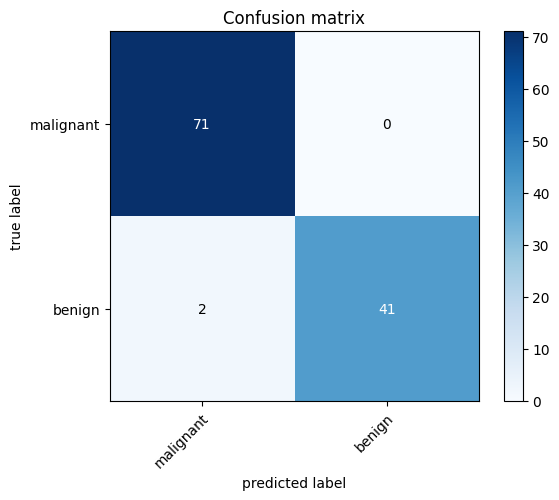

Cross validation score is: [1.         0.92982456 0.94736842 0.96491228 1.         0.98245614
 0.96491228 0.98245614 0.96491228 0.98214286]
Average cross validation score is: 0.9718984962406015


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
BreastCancerClassifier(rfc, x_data, y)

### Decision tree classifier

The accuracy score is: 0.9385964912280702


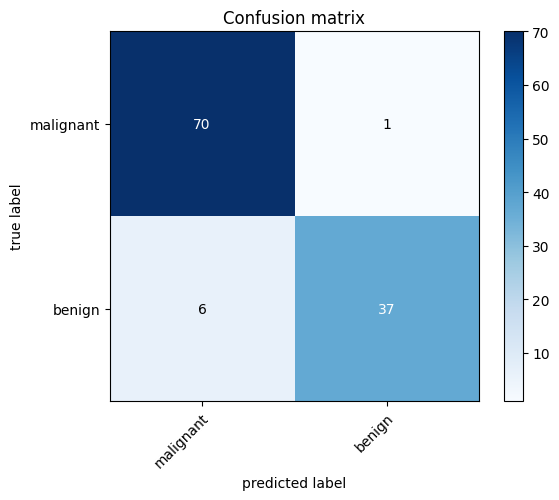

Cross validation score is: [0.94736842 0.87719298 0.89473684 0.89473684 0.92982456 0.96491228
 0.94736842 0.94736842 0.94736842 0.98214286]
Average cross validation score is: 0.9333020050125314


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
BreastCancerClassifier(dtc, x_data, y)

In [22]:
#find best parameter by grid search
from sklearn.model_selection import GridSearchCV
def find_best_parameter(model, param_grid, x_train, y_train):
    grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=10)
    grid.fit(x, y)
    print('The best parameter for model is:')
    print(grid.best_params_)
    print('The best accuracy achived after tune the parameter for model is:', grid.best_score_)
    return grid.best_params_

The best parameter for model is:
{'criterion': 'entropy', 'min_samples_leaf': 9, 'min_samples_split': 3}
The best accuracy achived after tune the parameter for model is: 0.9490914786967419
The accuracy score is: 0.9385964912280702


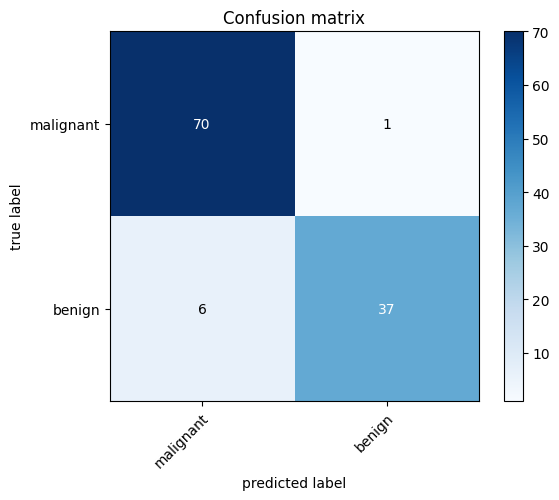

Cross validation score is: [0.92982456 0.92982456 0.9122807  0.94736842 0.94736842 0.96491228
 0.96491228 0.98245614 0.96491228 0.94642857]
Average cross validation score is: 0.9490288220551377


In [23]:
dt_clf = DecisionTreeClassifier()
min_sample_split_range = list(range(2,20))
min_samples_leaf_range = list(range(2,20))
param_dist = {'criterion' : ['gini', 'entropy', 'log_loss'],
            'min_samples_split': min_sample_split_range, 
            'min_samples_leaf': min_samples_leaf_range}
best_param_dt = find_best_parameter(dt_clf, param_dist, x_train, y_train)
dt_new = DecisionTreeClassifier(**best_param_dt)
BreastCancerClassifier(dt_new, x_data, y)

In [24]:
!pip install graphviz==0.20.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 7.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


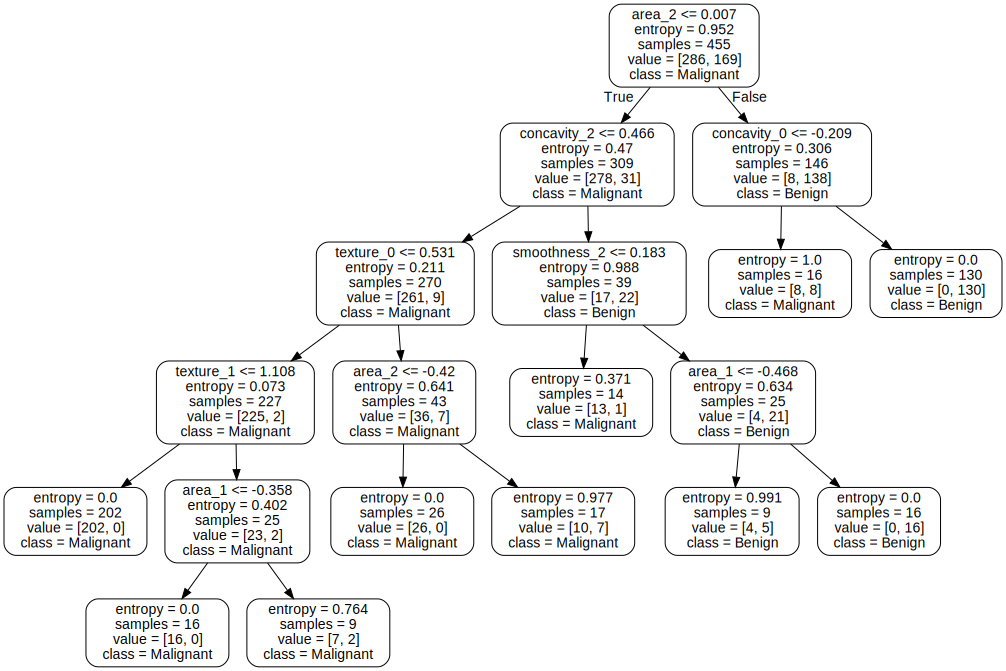

In [25]:
#https://mljar.com/blog/visualize-decision-tree/
from sklearn import tree
import graphviz
def plot_decision_tree(clf, feature):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                             feature_names = feature,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    pic = graphviz.Source(dot_data)  
    return pic 
feature = x_data.columns.values
plot_decision_tree(dt_new, feature)

### K nearest neighbors

The accuracy score is: 0.9298245614035088


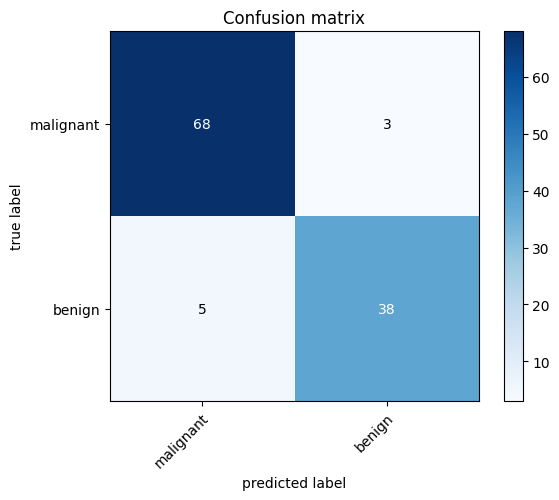

Cross validation score is: [0.98245614 0.94736842 0.94736842 0.94736842 0.94736842 0.96491228
 0.92982456 0.96491228 0.96491228 0.92857143]
Average cross validation score is: 0.9525062656641603


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
BreastCancerClassifier(knn_clf, x_data,y)

1 0.9542606516290727
2 0.9420112781954886
3 0.9578320802005011
4 0.9473057644110275
5 0.9525062656641603
6 0.950814536340852
7 0.956015037593985
8 0.9507832080200501
9 0.9578007518796993
10 0.9560776942355889
11 0.9595551378446114
12 0.9543233082706767
13 0.9613408521303258
14 0.956077694235589
15 0.9613408521303256
16 0.9525375939849624
17 0.9543233082706767
18 0.9525375939849624
19 0.9542919799498746
20 0.9542919799498746
21 0.9525062656641603
22 0.9472431077694236
23 0.9472431077694236
24 0.943765664160401
25 0.9490601503759397
26 0.943765664160401
27 0.9473057644110275
28 0.9455513784461151
29 0.950814536340852
30 0.9490601503759397
31 0.9508145363408522
32 0.950814536340852
33 0.9472744360902254
34 0.9490288220551377
35 0.9490288220551377
36 0.943765664160401
37 0.9490288220551377
38 0.9385025062656641
39 0.9420112781954886


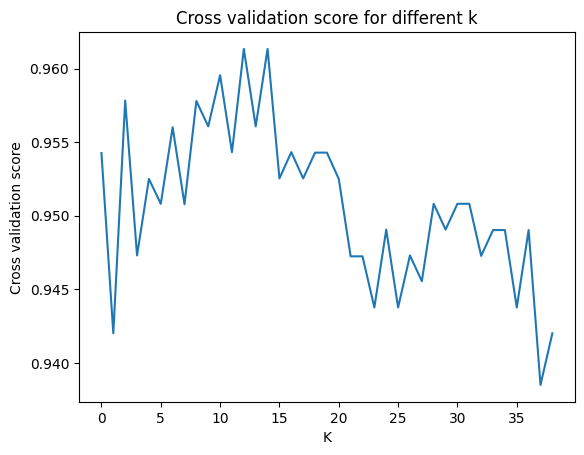

In [27]:
cv_error = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cv_score = cross_val_score(knn, x_data, y, cv=10)
    cv_avg = cv_score.mean()
    cv_error.append(cv_avg)
    print(k, cv_avg)

plt.plot(cv_error)
plt.xlabel('K')
plt.ylabel('Cross validation score')
plt.title('Cross validation score for different k')
plt.show()

From above plot we choose k=13.

The accuracy score is: 0.9385964912280702


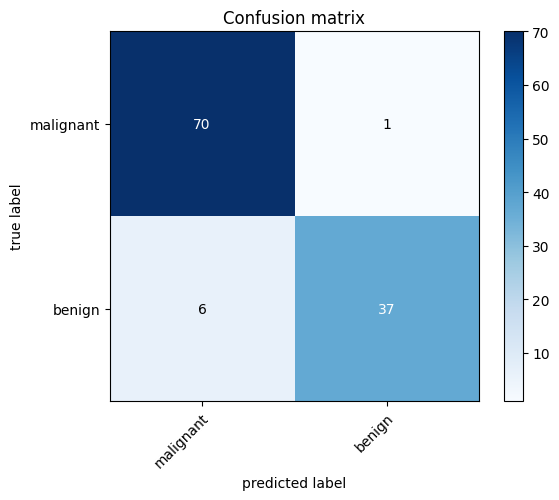

Cross validation score is: [1.         0.92982456 0.92982456 0.96491228 0.96491228 0.96491228
 0.92982456 0.98245614 0.98245614 0.96428571]
Average cross validation score is: 0.9613408521303258


In [28]:
knn_clf2 = KNeighborsClassifier(n_neighbors = 13)
BreastCancerClassifier(knn_clf2, x_data, y)

### Logistic regression classifier

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

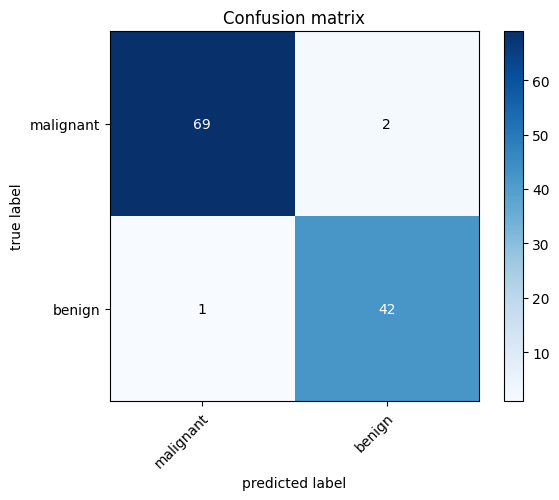

Cross validation score is: [0.96491228 0.98245614 0.94736842 0.94736842 1.         0.96491228
 0.94736842 0.94736842 0.98245614 0.98214286]
Average cross validation score is: 0.9666353383458647


In [29]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
best_param_log = find_best_parameter(log_clf, param_grid, x_train, y_train)
log_clf_grid = LogisticRegression(**best_param_log)
BreastCancerClassifier(log_clf_grid, x_data, y)

In [30]:
pred_prob = log_clf_grid.predict_proba(x_test)
y_test_np = y_test.to_numpy().reshape(-1)
lr_pred = np.column_stack((y_test_np, pred_prob))
lr_pred

array([[0.00000000e+00, 7.73429439e-01, 2.26570561e-01],
       [1.00000000e+00, 8.16724466e-12, 1.00000000e+00],
       [1.00000000e+00, 1.37184851e-06, 9.99998628e-01],
       [0.00000000e+00, 9.99998356e-01, 1.64350269e-06],
       [0.00000000e+00, 9.99999485e-01, 5.14559751e-07],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.44650748e-03, 9.96553493e-01],
       [0.00000000e+00, 9.67583880e-01, 3.24161198e-02],
       [0.00000000e+00, 9.99977624e-01, 2.23756082e-05],
       [0.00000000e+00, 9.84604804e-01, 1.53951959e-02],
       [1.00000000e+00, 1.67752338e-04, 9.99832248e-01],
       [0.00000000e+00, 9.99911795e-01, 8.82045623e-05],
       [1.00000000e+00, 2.65607461e-02, 9.73439254e-01],
       [0.00000000e+00, 9.99782600e-01, 2.17399802e-04],
       [1.00000000e+00, 2.13041413e-02, 9.78695859e-01],
       [0.00000000e+00, 9.99975403e-01, 2.45972151e-05],
       [0.00000000e+00, 9.99999

### SVM

The accuracy score is: 0.9649122807017544


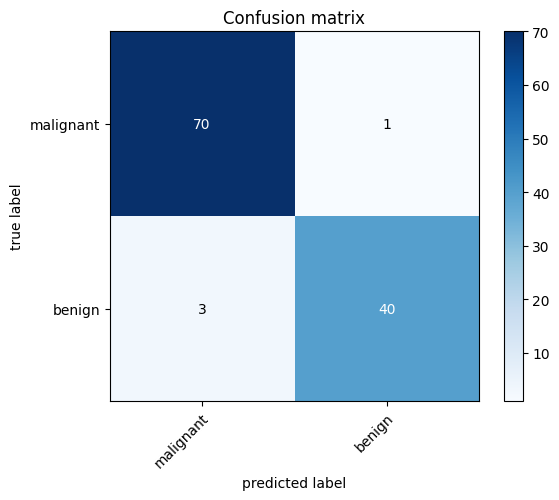

Cross validation score is: [0.98245614 0.94736842 0.92982456 0.98245614 1.         0.94736842
 0.92982456 1.         0.98245614 0.94642857]
Average cross validation score is: 0.9648182957393484


In [31]:
from sklearn.svm import SVC
svm = SVC()
BreastCancerClassifier(svm, x_data, y)

The best parameter for model is:
{'kernel': 'linear'}
The best accuracy achived after tune the parameter for model is: 0.9543233082706767
The accuracy score is: 0.9649122807017544


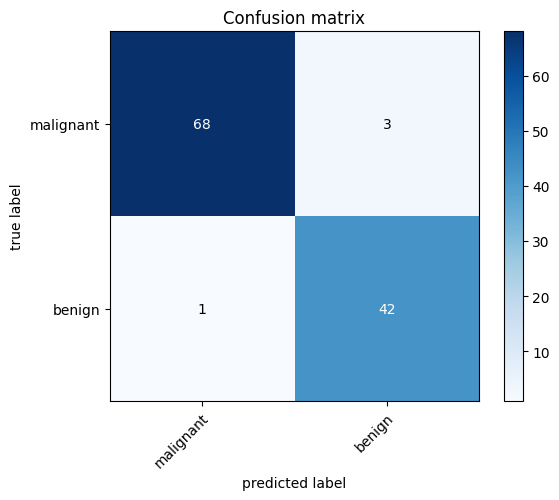

Cross validation score is: [1.         0.96491228 0.96491228 0.96491228 1.         0.96491228
 0.94736842 0.98245614 1.         0.96428571]
Average cross validation score is: 0.9753759398496239


In [32]:
#apply grid search to find best kernel
svm_clf = SVC()
param_svm = {'kernel' : ['linear', 'poly', 'rbf','sigmoid']}
best_param_svm = find_best_parameter(svm_clf, param_svm, x_train, y_train)
svm_grid = SVC(**best_param_svm)
BreastCancerClassifier(svm_grid, x_data, y)

### XGBoost

In [33]:
!pip install xgboost==1.7.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 11.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


The accuracy score is: 0.9824561403508771


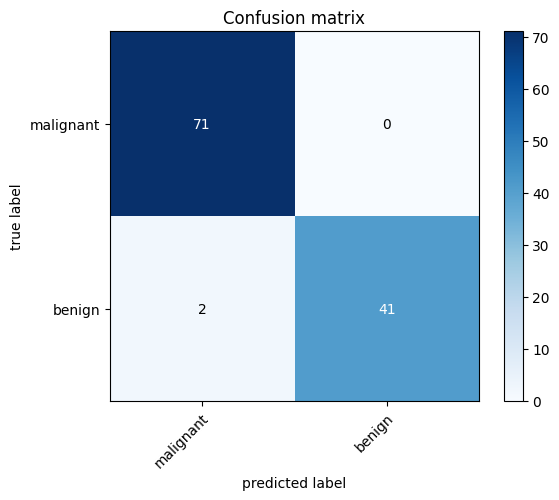

Cross validation score is: [1.         0.92982456 0.94736842 0.96491228 0.98245614 0.98245614
 0.94736842 0.96491228 0.96491228 0.98214286]
Average cross validation score is: 0.9666353383458647


In [34]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
BreastCancerClassifier(xgb_clf, x_data, y)

### Neural network

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
nn_clf = Sequential()
nn_clf.add(Dense(units=9, kernel_initializer='HeNormal', activation='relu', input_dim=18))
nn_clf.add(Dropout(rate=0.15))
nn_clf.add(Dense(units=9, kernel_initializer='HeNormal', activation='relu'))
nn_clf.add(Dense(units=1, kernel_initializer='GlorotUniform', activation='sigmoid'))

2023-03-16 18:05:45.750309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 18:05:45.854943: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-16 18:05:45.859722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 18:05:45.859736: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [38]:
nn_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
nn_history = nn_clf.fit(x_train,y_train,batch_size=32,validation_split=0.15,epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 15ms/step - loss: 0.8905 - accuracy: 0.4197 - val_loss: 0.8319 - val_accuracy: 0.3623
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8093 - accuracy: 0.4585 - val_loss: 0.7691 - val_accuracy: 0.4058
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.5233 - val_loss: 0.7187 - val_accuracy: 0.4638
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.6140 - val_loss: 0.6786 - val_accuracy: 0.6232
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.6477 - val_loss: 0.6446 - val_accuracy: 0.6377
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.7098 - val_loss: 0.6142 - val_accuracy: 0.6957
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7098 - val_loss: 0.5855 - val_accuracy: 0.7246
Epoch 8/150


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


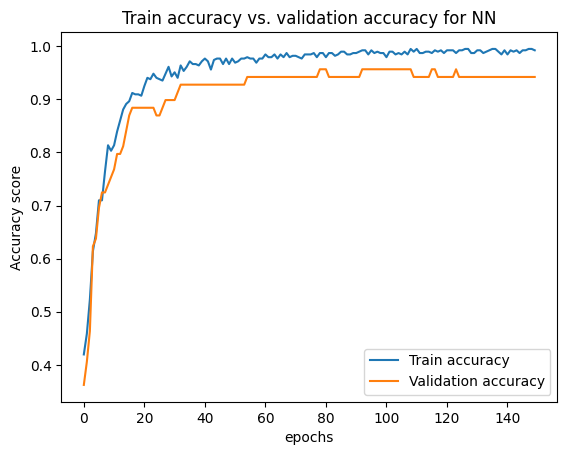

In [40]:
print(nn_history.history.keys())
acc_cnn = nn_history.history['accuracy']
val_acc_cnn = nn_history.history['val_accuracy']
loss_train_cnn = nn_history.history['loss']
val_loss_cnn = nn_history.history['val_loss'] 
plt.plot(acc_cnn, label='Train accuracy')
plt.plot(val_acc_cnn, label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy score')
plt.title('Train accuracy vs. validation accuracy for NN')
plt.legend()
plt.show()

In [41]:
loss_nn, acc_nn = nn_clf.evaluate(x_test, y_test, batch_size=64)
print('Accuracy for neural network is:', acc_nn)

2/2 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9737
Accuracy for neural network is: 0.9736841917037964


4/4 [==============================] - 0s 3ms/step


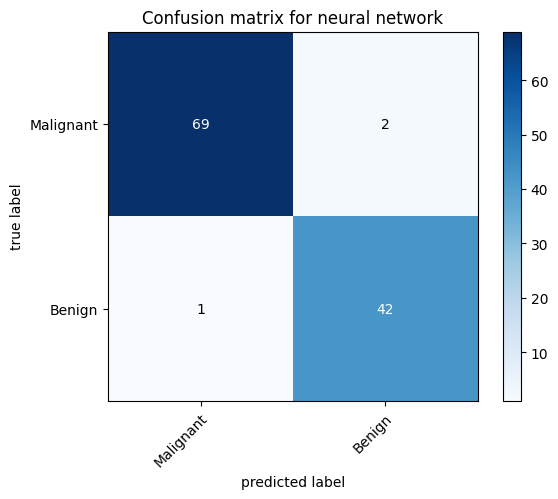

In [42]:
nn_pred = nn_clf.predict(x_test)
nn_pred = nn_pred > 0.5
cm_nn = confusion_matrix(y_test, nn_pred)
classes = ['Malignant', 'Benign']
figure, ax = plot_confusion_matrix(conf_mat = cm_nn,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)
plt.title('Confusion matrix for neural network')
plt.show()

### Demo

After evaluation, we choose XGBoost as our final model.

In [68]:
#predict
test_point = x_test[:1]
clf_pred = xgb_clf.predict(test_point)
#predict probability
clf_pred_prob = xgb_clf.predict_proba(test_point)
if clf_pred == 0:
    res = 'Benign'
else:
    res = 'Malignant'
beni_prob = clf_pred_prob[0,0]
mali_prob = clf_pred_prob[0,1]
print('Diagonsis for the patient is:', res)
print('Model diagnosis probability for the patient to be benign is:', beni_prob)
print('Model diagnosis probability for the patient to be malignant is:', mali_prob)

Diagonsis for the patient is: Benign
Model diagnosis probability for the patient to be benign is: 0.92628676
Model diagnosis probability for the patient to be malignant is: 0.07371324


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e46194a2-bd7c-40bb-8f92-65ea939f0118' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>